In [1]:
from math import *

In [2]:
# old values for constants of nature that reproduce the digits in CoRE tables.
# Taken from BNSInspiralComparison's PWP4EOS.m file.

G = 6.67300e-8      # cm^3 g^-1 s^-2
c = 2.99792458e+10  # cm/sec

Msun = 1.98892e33   # g

## SLy EOS

In [3]:
Gamma1 = 3.005
Gamma2 = 2.988
Gamma3 = 2.851
logP1 = 34.384 # dyne/cm^2

rho1 = 10**14.7  # Read et al.
rho2 = 10**15.   # Read et al.

GammaCrust = 1.35692

""" don't use

# Error in original literature (Read et al.)
KCrust = 3.99874e-8 # such that KCrust rho**GammaCrust is dyn/cm^2, Note error in original literature (!)

# From Read et al. Phys. Rev. D 79, 124033 – Published 22 June 2009
# which states "The crust is modeled with a single polytrope region,
# fitted to a tabulated crust EOS, for the region above neutron drip.
# The polytrope has GammaCrust=1.3569, with Kcrust chosen so that
# P=1.5689e31 dyn cm−2 when rho=1e13  g cm−3."
# This results in a large Kcrust differernt (1e-5 vs 1e13 order of
# mag and different digits)
KCrust = 1.5689e31/1e13**GammaCrust
print(KCrust/1e13)

"""

# from Phys.Rev.D80:124004,2009 section D.2. "Choice of the parameters" "The lower density interval approx-
# imates the known subnuclear density EOS, the fixed crust EOS, around 0.1ρnuc~ρnuc by setting (Γ0 , K0 ) =
# (1.35692, 3.59389 × 10^13)"
KCrust = 3.59389e13

In [4]:
P1 = 10**logP1

In [5]:
K1 = P1/rho1**Gamma1               # from P1 is pressure at rho1

In [6]:
K2 = K1 * rho1**(Gamma1 - Gamma2)  # from pressure continuous at rho1
K3 = K2 * rho2**(Gamma2 - Gamma3)  # from pressure continuous at rho2

In [7]:
# attach lowest density segment to crust at intersection point
# KCrust rho0**GammaCrust = K1 rho0**Gamma1
# <=> rho0**(GammaCrust - Gamma1) = K1/KCrust
# <=>
rho0 = (K1/KCrust)**(1/(GammaCrust - Gamma1))

In [8]:
print(log10(rho0))

14.165007026543973


## Conversion to geometric units

In [9]:
r0 = rho0 / Msun * (Msun*G/c**2)**3
print(r0)

0.00023674499879939537


In [10]:
r1 = rho1  / Msun * (Msun*G/c**2)**3
print(r1)

0.0008114724630501216


In [11]:
r2 = rho2  / Msun * (Msun*G/c**2)**3
print(r2)

0.001619100425158887


In [12]:
# units of the Ks are such that pressure is dyn/cm^2 or
# force/length^2 which is 1/length^2 is geometric units

# P = K rho**Gamma = K rho_unit**Gamma (rho/rho_unit)**Gamma
# P/P_unit = K rho_unit**Gamma/P_unit (rho/rho_unit)**Gamma

# rho_unit = Msun / (Msun*G/c**2)**3
# P_unit = Msun * (Msun*G/c**2) / (Msun*G/c**3)**2 / (Msun*G/c**2)**2
#           g         cm                s**2              cm**2

rho_unit = Msun / (Msun*G/c**2)**3
P_unit = Msun * (Msun*G/c**2) / (Msun*G/c**3)**2 / (Msun*G/c**2)**2

In [13]:
k0 = KCrust * (rho_unit**GammaCrust/P_unit)
print(k0)

0.08949306339299425


In [14]:
k1 = K1 * (rho_unit**Gamma1/P_unit)
print(k1)

84579.41004700682


In [15]:
k2 = K2 * (rho_unit**Gamma2/P_unit)
print(k2)

74941.48695783653


In [16]:
k3 = K3 * (rho_unit**Gamma3/P_unit)
print(k3)

31073.68899483962


## Test of equation of state

In [17]:
# speed of sound for polytrope
def cs2(rho, press, eps, K, Gamma):
    return Gamma*press / rho / (1. + eps + press/rho)

In [18]:
pwp_K = [k0,k1,k2,k3]
pwp_Gamma = [GammaCrust, Gamma1, Gamma2, Gamma3]
pwp_rho = [0., r0, r1, r2]
pwp_eps = [0., 0., 0., 0.]

for i in range(1, len(pwp_eps)):
    press = pwp_K[i] * pwp_rho[i]**pwp_Gamma[i]
    # P = rho eps (Gamma-1)
    eps_lower = pwp_eps[i-1] + press / pwp_rho[i] / (pwp_Gamma[i-1] - 1.)
    eps_upper =                press / pwp_rho[i] / (pwp_Gamma[i  ] - 1.)
    pwp_eps[i] = eps_lower - eps_upper

def calc_press(rho):
    for i in range(len(pwp_rho)-1,0,-1):
        if rho > pwp_rho[i]:
            break
    return pwp_K[i] * rho**pwp_Gamma[i]

def calc_eps(rho):
    for i in range(len(pwp_rho)-1,0,-1):
        if rho > pwp_rho[i]:
            break
    press = pwp_K[i] * rho**pwp_Gamma[i]
    return press / rho / (pwp_Gamma[i] - 1.) + pwp_eps[i]

def calc_cs2(rho):
    for i in range(len(pwp_rho)-1,0,-1):
        if rho > pwp_rho[i]:
            break
    press = pwp_K[i] * rho**pwp_Gamma[i]
    eps = press / rho / (pwp_Gamma[i] - 1.) + pwp_eps[i]
    return cs2(rho, press, eps, pwp_K[i], pwp_Gamma[i])

for i in range(1, len(pwp_rho)):
    print(sqrt(calc_cs2(pwp_rho[i]*1.0)))


0.11589098654582985
0.3847548592564837
0.690678183575592


In [33]:
# plot some quantities to check that things are sane

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

x = np.linspace(0.5*pwp_rho[1], 1.50*pwp_rho[3], 1001)
data = [sqrt(calc_cs2(rho)) for rho in x]

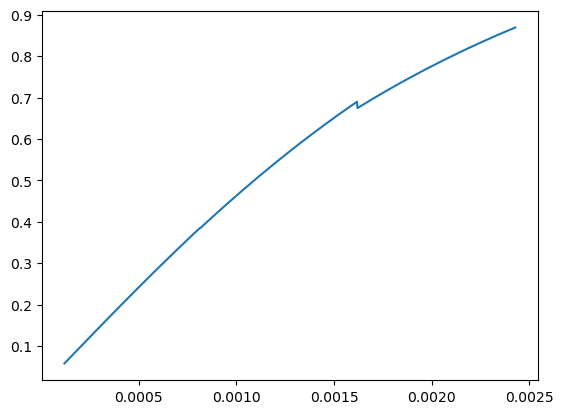

In [34]:
plt.plot(x, data)